In [27]:
%matplotlib inline
import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [28]:
df = pd.read_csv('Blinded_Data.csv')
df.drop(columns=["ESI Score","Disposition","72 Hr Return Time","Dispo Date/Time","Depart Date/Time"],axis=1,inplace=True)
df['Arrival Date/Time'] = df['Arrival Date/Time'].astype(str)
df['Arrival Date/Time'] = pd.to_datetime(df['Arrival Date/Time'], format="%m/%d/%Y %H:%M")
df.dtypes

Arrival Date/Time    datetime64[ns]
dtype: object

In [29]:
df=df.resample('H', on='Arrival Date/Time').count() 

In [30]:
df.columns=["Patients"]
df.head()

,Patients
Arrival Date/Time,
2019-02-22 00:00:00,5
2019-02-22 01:00:00,4
2019-02-22 02:00:00,2
2019-02-22 03:00:00,5
2019-02-22 04:00:00,1


In [31]:
for col in df.columns: 
    print(col) 

Patients


In [32]:
df.describe()

,Patients
count,9864.000000
mean,5.761861
std,3.697603
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,24.000000


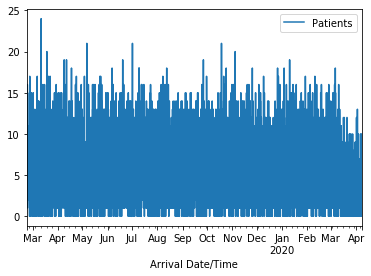

In [33]:
df.plot()

In [34]:
## Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [35]:
test_result=adfuller(df['Patients'])

In [37]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [38]:
adfuller_test(df['Patients'])

ADF Test Statistic : -12.373785251450911
p-value : 5.21021146634837e-23
#Lags Used : 35
Number of Observations Used : 9828
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


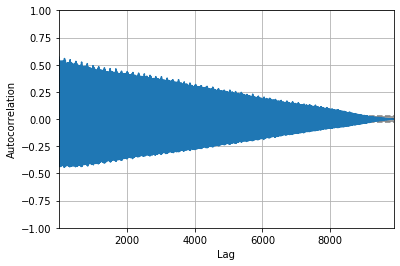

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Patients'])
plt.show()

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [44]:

# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [46]:

model=ARIMA(df['Patients'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Patients   No. Observations:                 9863
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24945.451
Method:                       css-mle   S.D. of innovations              3.034
Date:                Tue, 16 Mar 2021   AIC                          49898.903
Time:                        21:22:08   BIC                          49927.689
Sample:                    02-22-2019   HQIC                         49908.653
                         - 04-07-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0002      0.000     -1.435      0.151      -0.001       8e-05
ar.L1.D.Patients     0.5612      0.008     66.887      0.000       0.545       0.578
ma.L1.D.Patients    -0.9979      0.001  -1542.203      0.000      -0.999      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7818           +0.0000j            1.7818            0.0000
MA.1            1.0021           +0.0000j            1.0021            0.0000
-----------------------------------------------------------------------------
"""

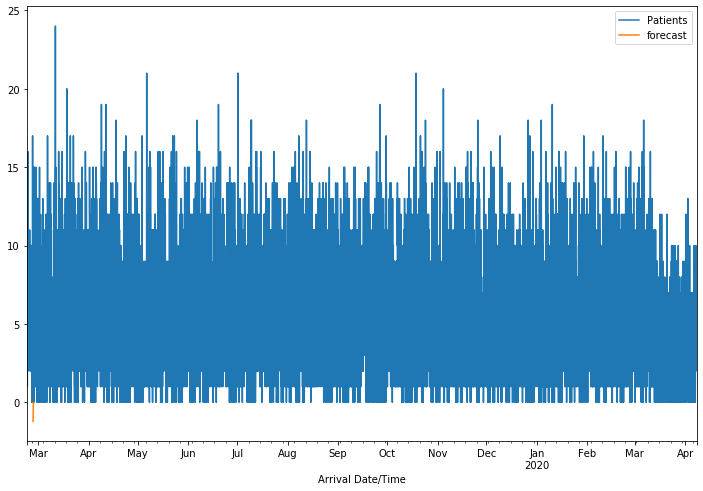

In [47]:

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Patients','forecast']].plot(figsize=(12,8))